In [1]:
import sys                       
sys.path.append('../scripts/')
from robot import *
from scipy.stats import uniform, norm

In [2]:
class RandomRobot(Robot):
        
    def __init__(self, pose, agent=None, sensor=None, color="black", \
                           noise_prob=0.1, noise_stderr=math.pi/60, bias_stddev=(0.1,0.1)):
        super().__init__(pose, agent, sensor, color)
        self.noise_prob = noise_prob
        self.noise_stderr = noise_stderr
        self.bias_rate_nu = norm.rvs(loc=1.0, scale=bias_stddev[0])
        self.bias_rate_omega = norm.rvs(loc=1.0, scale=bias_stddev[1])
    
    def noise(self):
        t_noise = 0.0
        
        if uniform.rvs() < self.noise_prob:   #0~1から1つ値を選んで閾値と比較
            t_noise = norm.rvs(scale=self.noise_stderr) #ガウス分布から値をドロー

        return np.array([0.0, 0.0, t_noise]) #x,yと共に返す
        
    def one_step(self, time_interval):
        if not self.agent: return
        nu, omega = self.agent.decision()
        nu *= self.bias_rate_nu
        omega *= self.bias_rate_omega
        self.pose = self.func_state_transition(nu, omega, time_interval, self.pose) + self.noise()
        if self.sensor: self.sensor.data(self.pose)

<IPython.core.display.Javascript object>


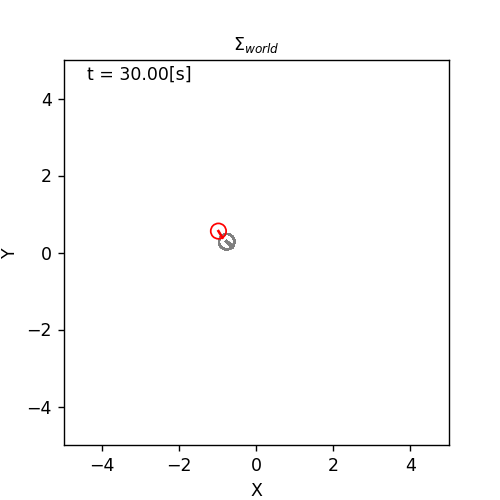

In [3]:
import copy

world = World(30.1, 0.1) 

circling = Agent(0.2, 10.0/180*math.pi)
r = RandomRobot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="gray", noise_prob=0.0)  #灰色を指定
for i in range(100):
    world.append(copy.copy(r))
    
r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red" )  #Robotのオブジェクトを作って赤色を指定
world.append(r)

world.draw()

<IPython.core.display.Javascript object>


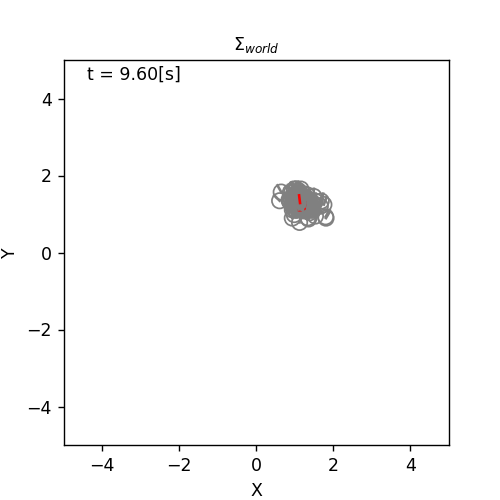

In [4]:
world = World(30.1, 0.1) 

for i in range(100):
    circling = Agent(0.2, 10.0/180*math.pi)
    r = RandomRobot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="gray" )  #灰色を指定
    world.append(r)
    
r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red" )  #Robotのオブジェクトを作って赤色を指定
world.append(r)

world.draw()